# Lab 6

## Problem 1

**b) Create a 1D Numpy array labels and read in all labels from `labels.txt`**

In [65]:
import numpy as np

label_list = []

with open('data/labels.txt', 'r') as file:
    for line in file:
        label = int(line.strip())
        label_list.append(label)

labels = np.array(label_list) # This is more efficient than initiating an empty numpy array and then appending to it:
                              # It avoids the resizing and copying that occurs with np.append

**c) Create a 3D Numpy array test. The first dimension shall represent the image index (0 to 9999) while the second and third dimension represent the image pixels.**

In [66]:
image_size = 28
num_images = 10000

test = np.empty((num_images, image_size, image_size))
# print("Shape of the array:", test.shape)

**d) Generate a list of all images `imgNames`` using list comprehension.**

In [67]:
img_names = ["data/test_"+str(i).zfill(len(str(num_images)))+".gif" for i in range(num_images)]

**e) Iterate through all image files. In every iteration, load the associated image file, convert it to a Numpy
array, divide it by 255 to normalize it to 1 and store it in test.**

In [68]:
from PIL import Image
# iterate through all image files
    # load the associated image file, convert it to a Numpy array
    # divide it by 225 to normalize it to 1
    # store it in test

i = 0
for i, img_name in enumerate(img_names):
    image = Image.open(img_name)
    image_np = np.array(image) / 255
    test[i] = image_np
    # print("shape ", image_np.shape)

In [69]:
# print(test[150])

## Problem 2

**a) Draw a digit**

![digit_four](four.gif)

**b) Load image of digit onto notebook and rescale**

In [70]:
filename = 'four.gif'
my_digit_img = Image.open(filename).convert('L') # Load image
my_digit_resized = my_digit_img.resize(size=(image_size ,image_size)) # resize it to 28 x 28
my_digit_np = np.array(my_digit_resized)  / 255 

**c) Generate a single plot of five MNIST images of your digit**

In [71]:
# I have the images in my `test` np.array
# I have the labels for each image in my `labels` np.array

# Find 5 instances of my digit in `labels`
# Store their index 
# Find the corresponding images in my array `test`

desired_digit = 4
indices = np.where(labels == desired_digit)[0][:5]
digit_imgs = test[indices]
digit_imgs = np.concatenate([digit_imgs, [my_digit_np]], axis=0)


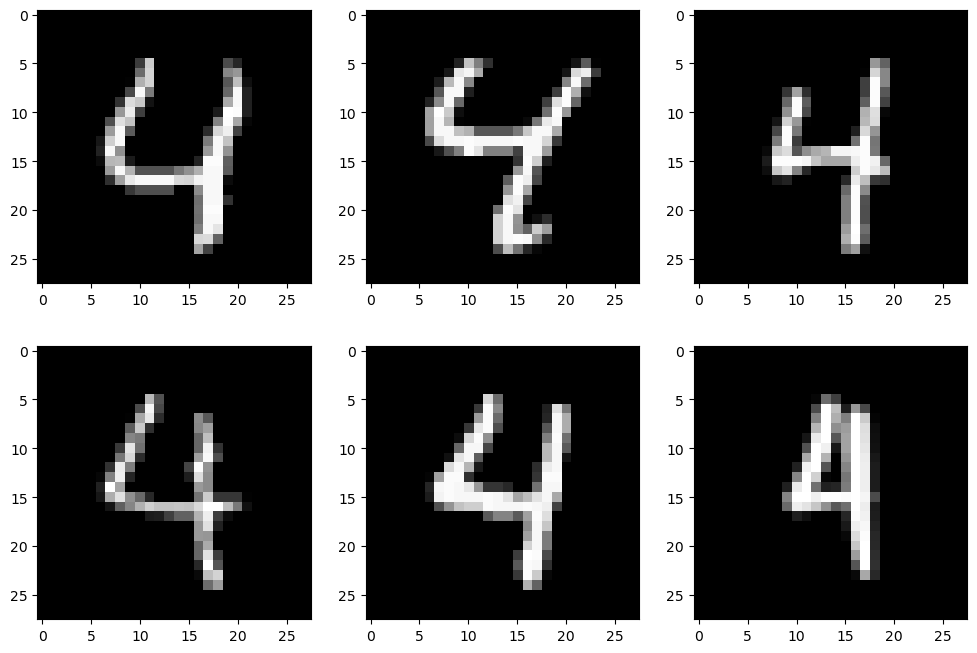

In [72]:
import matplotlib.pyplot as plt
# Generate plot with images of my digit
# Create a figure and 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axs array for easier iteration
axs_flat = axs.flatten()

# Loop through data and subplots to plot
for i, (dat, ax) in enumerate(zip(digit_imgs, axs_flat), start=1):
    ax.imshow(dat, cmap='gray_r', interpolation='None')  

plt.show()

# Problem 3

**a) Copy all the code that is required to create an instance of the class `neuralNetwork` which will be extended method by method throughout the next weeks before we switch to `Tensorflow`.**

In [73]:
from neural_network import neuralNetwork as nn

iNodes = 784 # The images are 28x28 pixels
hNodes = 100 # An educated guess
oNodes = 10 # Ten digits

lRate = 0.3 # More on that next week

testNet = nn(iNodes, hNodes, oNodes, lRate) # Create an instance of the network

print(testNet)

Input nodes: 784, Hidden nodes: 100, Output nodes: 10, Learning rate: 0.3, wih matrix shape: (100, 784), who matrix shape: (10, 100)


**b) Write a function `softmax(arr)` that applies the softmax operation to a Numpy array**

$\textrm{softmax(}x\textrm{)} = \frac{\textrm{exp(}x_{i}\textrm{)}}{\sum \textrm{exp(}x_{i}\textrm{)}}$

In [74]:
def softmax(arr):
    numerator = np.exp(arr)
    denominator = np.sum(np.exp(arr))
    return (numerator / denominator)

**c) Use the network’s query method to feed your handwritten digit into the network. Divide the image array by 255 before you pass it to the query method. Apply the softmax function to the output vector and verify that the sum of its entries equals 1.**

In [81]:
prediction = testNet.query(my_digit_np)
norm_prediction = softmax(prediction)

print(norm_prediction)
print(np.sum(norm_prediction))

[0.13357031 0.10388126 0.0834535  0.10168068 0.06882786 0.11644264
 0.07380554 0.0750556  0.12835539 0.11492721]
0.9999999999999999
